## K-Mean Algorithm

### What is K-Mean algorithm?
- K- Mean is a unsupervised machine learning algorithm the groups similar data points together into K Clusters.


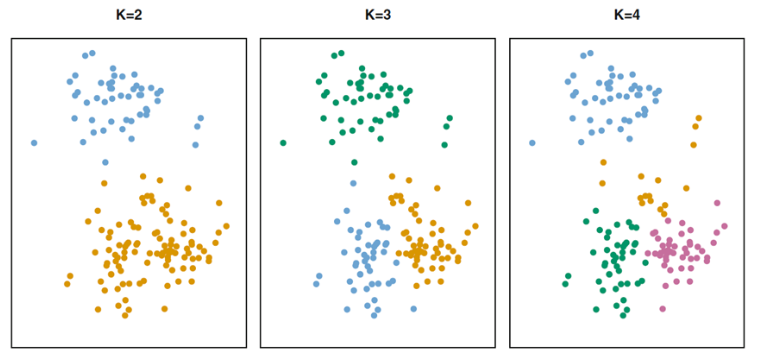

### How does K - Means works?
- 1. Initialize
  2. Assignment Step
  3. Update Step
  4. Repeat

In [1]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
# Load dataset
data = pd.read_csv("../data/Mall_Customers.csv")

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
# Standarized the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Determining the optimal number of cluster 
# using Elbow method

wcss = []
for i in range(1, 11):
    kmean = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmean.fit(X_scaled)
    wcss.append(kmean.inertia_)

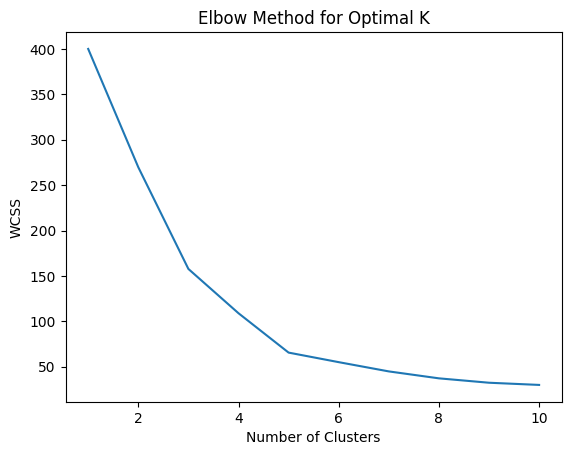

In [11]:
# Plot the elbow graph

plt.plot(range(1,11), wcss)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
## Running the K mean with k=5

kmeans = KMeans(n_clusters=5, init= "k-means++", max_iter=400, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [13]:
data['cluster'] = y_kmeans

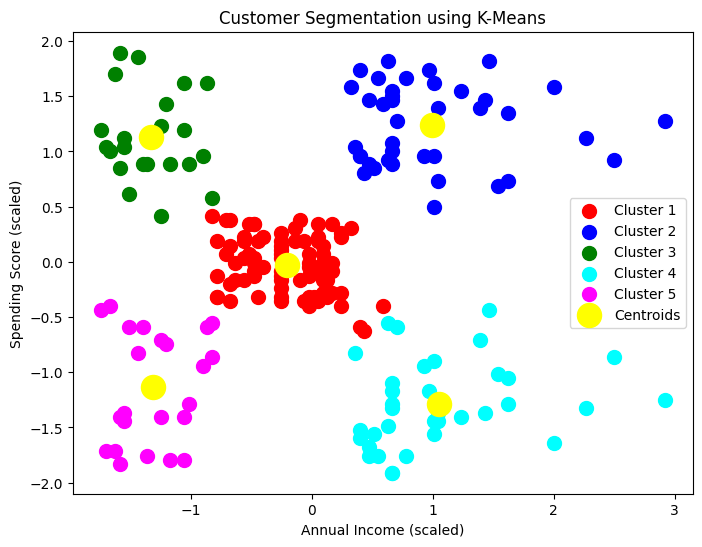

In [14]:
# Plotting the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


In [ ]:
X

In [ ]:
X_scaled

In [ ]:
data